# Analysis of Public Comments Regarding the EPA's Revised Definition of The Clean Water Rule

Example code for NH-Python Meetup April 2020

## <a name="library-imports"></a>Library Imports

In [40]:
# Standard imports
import re
import warnings
warnings.filterwarnings('ignore', 'DeprecationWarning') 

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
# Model and analysis imports
from sklearn.cluster import KMeans
from sklearn import metrics

In [61]:
# Get color codes from Seaborn palette for charts
pal = sns.color_palette('muted')
hex_list = pal.as_hex()

blue_hexcode = hex_list[-1]
red_hexcode = hex_list[3]
gray_hexcode = hex_list[7]

## Simple Clustering Example

In [46]:
# Generate random data
np.random.seed(101)
mid_1 = (3, 2.5)
dx_1 = np.random.normal(0, 0.25, 20)
dy_1 = np.random.normal(0, 0.25, 20)

set_1 = [(mid_1[0]+x, mid_1[1]+y) for x, y in zip(dx_1, dy_1)]
x_1, y_1 = zip(*set_1)


mid_2 = (1.5, 1.5)
dx_2 = np.random.normal(0, 0.35, 20)
dy_2 = np.random.normal(0, 0.25, 20)

set_2 = [(mid_2[0]+x, mid_2[1]+y) for x, y in zip(dx_2, dy_2)]
x_2, y_2 = zip(*set_2)

mid_3 = (3.25, 1)
dx_3 = np.random.normal(0, 0.25, 20)
dy_3 = np.random.normal(0, 0.25, 20)

set_3 = [(mid_3[0]+x, mid_3[1]+y) for x, y in zip(dx_3, dy_3)]
x_3, y_3 = zip(*set_3)

data = np.concatenate([np.array(set_1), np.array(set_2), np.array(set_3)], axis=0)

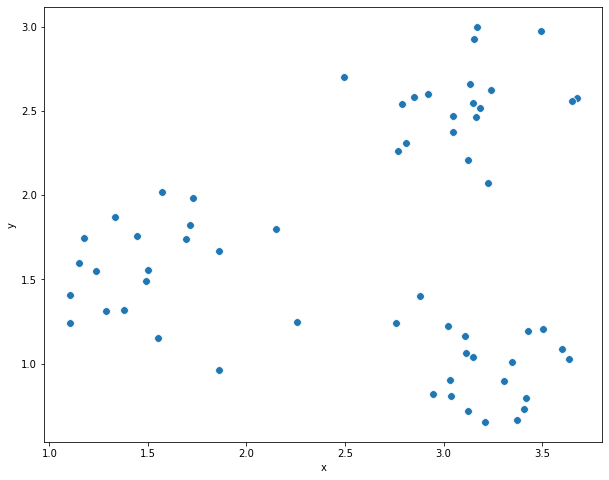

In [48]:
plt.figure(figsize=(10, 8));
plt.xlabel("x");
plt.ylabel("y");
sns.scatterplot(x=data[:, 0],y=data[:, 1], s=60);
plt.savefig('./Figures/ClusterExample.png');

In [37]:
i = []
s = []

for n in range(2, 7):
    model = KMeans(n_clusters=n,
                   max_iter=100,
                   n_init=1,
                   n_jobs=-1)
        
    model.fit(data)
    i.append(model.inertia_)
    s.append(metrics.silhouette_score(data, model.labels_))
    

In [38]:
def plot_cluster_scores(title, inertias, silhouettes):
    """
    Create side-by-side line charts of inertia and silhouette scores for
        clustering model and saves the figure
    :param title: str, the type of vectorizer for the chart title and saved
        file name
    :param inertias: list of inertia scores run over range of clusters
    :param silhouettes: list of silhouette scores run over range of clusters
    :return: None
    """
    plt.subplots(1, 3, figsize=(20, 6))
    clusters = list(range(2, len(inertias) + 2))
    i_x_c = np.array(inertias) * clusters
    
    # Cluster-inertia plot
    plt.subplot(1, 3, 1)
    plt.plot(clusters, inertias, 'o--', c=blue_hexcode)
    plt.xticks(clusters)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia Score')
    plt.title('{}: Inertia Score by Cluster Count\n'
              '{} Vectorizer'
              .format('KMeans', title));
    
    # Cluster-inertia * no. of clusters plot
    plt.subplot(1, 3, 2)
    plt.plot(clusters, i_x_c, 'o--', c=gray_hexcode)
    plt.xticks(clusters)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia Score Times No. of Clusters')
    plt.title('{}: Inertia Score * Cluster by Cluster Count\n'
              '{} Vectorizer'
              .format('KMeans', title));

    # Cluster-silhouette score plot
    plt.subplot(1, 3, 3)
    plt.plot(clusters, silhouettes, 'o--', c=red_hexcode)
    plt.xticks(clusters)
    plt.ylim((0, 1))
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('{}: Silhouette Score by Cluster Count\n'
              '{} Vectorizer'
              .format('KMeans', title));

    plt.savefig('./Figures/{}_{}_Inertia-Silhouette.png'
                .format('KMeans', title));
    plt.show()

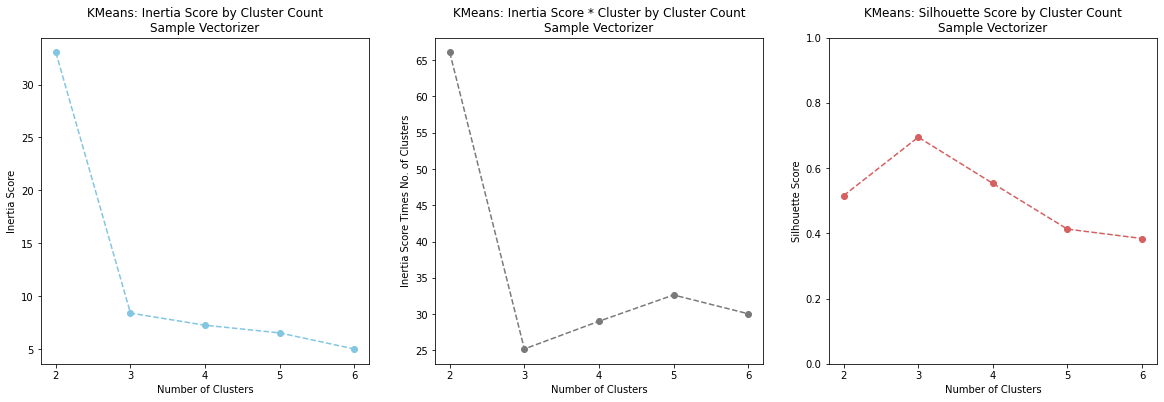

In [39]:
# Plot the example charts
plot_cluster_scores('Sample', i, s)